8/7
[ 표정인식팀(성별 인식팀 함께 논의) ]

<다음시간 할 내용>
1.Kadenze source를 이용하여 data를 전처리 해봄.

2.전처리한 데이터(얼굴 cropping + 100x100 size)를 구글드라이브에 올려 오픈링크로 공유하기 1)Git의 readme.md 수정

2)한승엽님 - Crawling Images / 신성진님 - CK(+) / 추광재 - JAFFE / 전창욱님 - RaFD DB

3.하나의 감정을 모델링까지 (가능하다면) - Happy 인지 아닌지 

<팀프로젝트 관련 토의내용>

1.화면 실시간 캡쳐 및 인식 - 실시간 tracking보다 간헐적으로 capture 하는 방식으로 하자.

2.누구인지 인식 - MS face API detect를 이용?

3.최종적으로는 얼굴특징인식(화살표 표시  방식의 특징 인식)기법을 이용하여 인식율을 올려보자.

# OS 폴더 불러오기 및 수정하기

## Goal: 파일 폴더 안에 있는 이미지를 찾아서 로드

1. 파일 목록 얻기

(1) glob.glob(wildcard) - 유닉스 경로명 패턴 스타일로 파일 목록을 얻을 수 있다.

(2) os.listdir(path) - 지정된 디렉토리의 전체 파일 목록을 얻을 수 있다.

(3) dircache.listdir(path) - os.listdir(path)와 동일한 파일 목록을 전달한다.

path가 변경되지 않았을 때, dircache.listdir()은 다시 디렉토리 구조를 읽지 않고 이미 읽은 정보를 활용

dircache.annotate(head, list) - 일반 파일명과 디렉토리명을 구분해주는 함수

2. 디렉토리 다루기

os.chdir(path) - 작업하고 있는 디렉토리 변경

os.getcwd() - 현재 프로세스의 작업 디렉토리 얻기
기타 여러 함수가 있다.

3. 파일 이름 다루기

os.path.abspath(filename) - 파일의 상대 경로를 절대 경로로 바꾸는 함수

os.path.exists(filename) - 주어진 경로의 파일이 있는지 확인하는 함수

os.curdir() - 현재 디렉토리 얻기

os.pardir() - 부모 디렉토리 얻기

os.sep() - 디렉토리 분리 문자 얻기

4. 경로명 분리하기

os.path.basename(filename) - 파일명만 추출

os.path.dirname(filename) - 디렉토리 경로 추출

os.path.split(filename) - 경로와 파일명을 분리

os.path.splitdrive(filename) - 드라이브명과 나머지 분리 (MS Windows의 경우)

os.path.splitext(filename) - 확장자와 나머지 분리


os.path.join(path1[,path2[,...]])

해당 OS 형식에 맞도록 입력 받은 경로를 연결합니다. (입력 중간에 절대경로가 나오면 이전에

취합된 경로는 제거하고 다시 연결합니다)

first_folder = os.path.join(image_folder, 'S010', '001')
os.path.exists(first_folder)

In [1]:
#'/media/ryan/Windows_D/CK_CK+/CK/cohn-kanade'

import os
ck_folder = '/media/ryan/Windows_D/CK_CK+/CK/cohn-kanade/'
os.path.exists(ck_folder)
os.chdir(ck_folder)

In [20]:
#모든 이미지 찾아서 저장하기

ck_files = [os.path.join(root, name)
             for root, dirs, files in os.walk(image_folder)
             for name in files
             if name.endswith((".png", ".jpg"))]

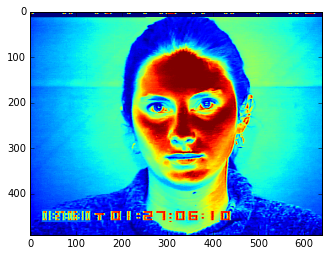

In [28]:
#image display

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

img = plt.imread(ck_files[1])
plt.imshow(img)

# Goal2: 모든 이미지를 preprocessing 하기 (100 by 100)

In [35]:
# First check the Python version
import sys
if sys.version_info < (3,4):
    print('You are running an older version of Python!\n\n' \
          'You should consider updating to Python 3.4.0 or ' \
          'higher as the libraries built for this course ' \
          'have only been tested in Python 3.4 and higher.\n')
    print('Try installing the Python 3.5 version of anaconda '
          'and then restart `jupyter notebook`:\n' \
          'https://www.continuum.io/downloads\n\n')

# Now get necessary libraries
try:
    import os
    import numpy as np
    import matplotlib.pyplot as plt
    from skimage.transform import resize
except ImportError:
    print('You are missing some packages! ' \
          'We will try installing them before continuing!')
    !pip install "numpy>=1.11.0" "matplotlib>=1.5.1" "scikit-image>=0.11.3" "scikit-learn>=0.17"
    import os
    import numpy as np
    import matplotlib.pyplot as plt
    from skimage.transform import resize
    print('Done!')

# Import Tensorflow
try:
    import tensorflow as tf
except ImportError:
    print("You do not have tensorflow installed!")
    print("Follow the instructions on the following link")
    print("to install tensorflow before continuing:")
    print("")
    print("https://github.com/pkmital/CADL#installation-preliminaries")

# This cell includes the provided libraries from the zip file
try:
    from libs import utils
except ImportError:
    print("Make sure you have started notebook in the same directory" +
          " as the provided zip file which includes the 'libs' folder" +
          " and the file 'utils.py' inside of it.  You will NOT be able"
          " to complete this assignment unless you restart jupyter"
          " notebook inside the directory created by extracting"
          " the zip file or cloning the github repo.")

# We'll tell matplotlib to inline any drawn figures like so:
%matplotlib inline
plt.style.use('ggplot')

In [36]:
#ck 파일중에서 이미지 100개만 시험으로 로드해보기

filenames = ck_files[:100]
assert(len(filenames) == 100)

In [37]:
# Read every filename as an RGB image
imgs = [plt.imread(fname)[..., :3] for fname in filenames]

# Crop every image to a square
imgs = [utils.imcrop_tosquare(img_i) for img_i in imgs]

# Then resize the square image to 100 x 100 pixels
imgs = [resize(img_i, (100, 100)) for img_i in imgs]

# Finally make our list of 3-D images a 4-D array with the first dimension the number of images:
imgs = np.array(imgs).astype(np.float32)

In [40]:
imgs.shape

(100, 100, 100)

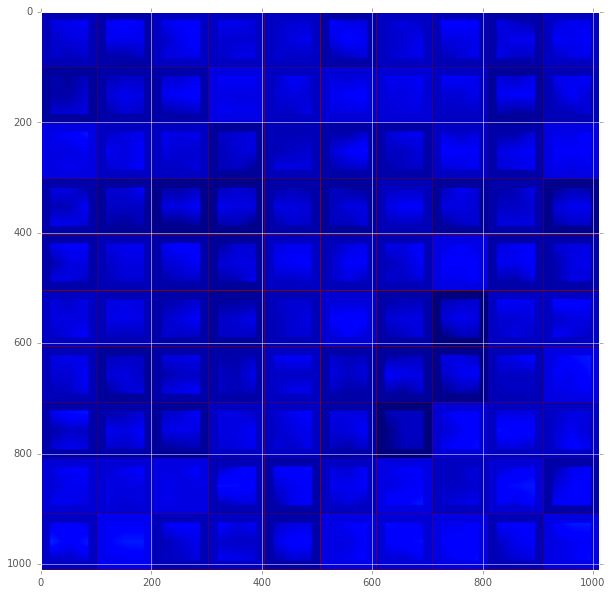

In [41]:
# Plot the resulting dataset:
# Make sure you "run" this cell after you create your `imgs` variable as a 4-D array!
# Make sure we have a 100 x 100 x 100 x 3 dimension array
#assert(imgs.shape == (100, 100, 100, 3))
assert(imgs.shape == (100, 100, 100))
plt.figure(figsize=(10, 10))
plt.imshow(utils.montage(imgs, saveto='dataset.png'))